# **Environmental Conditions Analysis and Energy Consumption Prediction for Greenhouses**

This project examines how different temperature set points affect energy usage in a double-bay greenhouse at the EW Fisheries Center. The East bay is operated with higher heating temperatures (77–76 °F) during the day and lower (67–66 °F) at night, while the West bay runs at much lower heating set points: 65–64 °F during the day and 55–54 °F at night. Both greenhouses share same cooling thresholds of 79–82 °F during the day and 69–72 °F at night, allowing heating differences to be separated and compared directly. Indoor climatic conditions were monitored using two `Apogee` weather stations in each bay, while a `Zentra` station outside records ambient weather. Together, these sensors record data on temperature, humidity, solar radiation (PPFD), CO<sub>2</sub> level, pressure etc. The goal is to determine how warmer versus cooler temperature strategies influence energy demand, ultimately helping Controlled Environment Agriculture to reduce heating and cooling loads, lower carbon emissions, and improve the sustainability and cost-efficiency of greenhouse systems.

## **Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Load Data**

Environmental data were collected continuously from the Apogee weather stations installed inside each greenhouse. These sensors record multiple climate variables including
- Temperature (°C),
- Humidity (%),
- CO<sub>2</sub> concentration (ppm),
- Photosynthetic Photon Flux Density aka PPFD (μmol/m<sup>2</sup>/s),
- Vapor Pressure Deficit, VPD (kPa), and
- Pressure (kPa)

to characterize greenhouse microclimate conditions. Measurements were logged at 10-minute intervals, providing high-resolution data for capturing rapid environmental variations and evaluating heating/cooling performance. An external `Zentra` weather station simultaneously recorded ambient weather conditions (logged at 15-minute intervals) for comparison and to help quantify greenhouse energy loads.

Each greenhouse contains two indoor `Apogee` weather stations positioned at opposite ends to capture spatial climate variation: one installed on the fan-wall (`FW`) side and the other on the cooling-wall (`CW`) side. In the dataset, the prefix `EF` refers to measurements collected from the East bay fan-wall station, while `EC` denotes data from the East bay cooling-wall station. Similarly, `WF` represents readings from the West bay fan-wall station, and `WC` indicates data recorded at the West bay cooling-wall station. This dual-station layout allows accurate monitoring of temperature, humidity, solar radiation, and other variables across both ends of each greenhouse.

The energy consumption data were collected using `Urban.io` energy-monitoring sensors, which log the hourly electrical usage for both East and West greenhouses. These sensors record continuous measurements of power use in the columns `Energy_East` and `Energy_West`, allowing direct comparison of how the two different temperature-setpoint strategies impact the energy use.

### 1. East Greenhouse

#### a. East Fan Wall Side Data

In [2]:
# EF indicates East Fan wall side
East_FW = pd.read_excel("../data/Oct-25_East.xlsx", sheet_name="EF")
East_FW.head()

,Date_EF,PPFD_EF,Temperature_EF,Humidity_EF,CO2_EF,Dew Point_EF,VPD_EF,Pressure_EF
0,Oct 1 2025 12:00:00 AM,0.000,20.455,98.275,634.4,20.097,0.042,99.524
1,Oct 1 2025 12:10:00 AM,0.000,20.437,98.661,639.1,20.142,0.032,99.520
2,Oct 1 2025 12:20:00 AM,0.000,20.422,98.523,637.5,20.105,0.036,99.515
3,Oct 1 2025 12:30:00 AM,0.023,20.325,98.644,643.4,20.028,0.032,99.520
4,Oct 1 2025 12:40:00 AM,0.000,20.403,98.517,629.4,20.084,0.036,99.512


#### b. East Cool Wall Side Data

In [3]:
# EC indicates East cool wall side
East_CW = pd.read_excel("../data/Oct-25_East.xlsx", sheet_name="EC")
East_CW.head()

,Date_EC,PPFD_EC,Temperature_EC,Humidity_EC,CO2_EC,Dew Point_EC,VPD_EC,Pressure_EC
0,Oct 1 2025 12:00:00 AM,0.028,20.228,99.306,653.0,20.039,0.016,99.458
1,Oct 1 2025 12:10:00 AM,0.027,20.266,99.247,655.7,20.068,0.018,99.451
2,Oct 1 2025 12:20:00 AM,0.042,20.236,99.256,655.0,20.039,0.018,99.449
3,Oct 1 2025 12:30:00 AM,0.020,20.193,99.321,655.9,20.007,0.016,99.456
4,Oct 1 2025 12:40:00 AM,0.080,20.216,99.235,651.3,20.016,0.018,99.450


### 2. West Greenhouse

#### a. West Fan Wall Side Data

_We don't have the data for West fan wall side as the weather station went under maintenance_

#### b. West Cool Wall Side Data

In [4]:
# WC indicates West cool wall side
West_CW = pd.read_excel("../data/Oct-25_West.xlsx")
West_CW.head()

,Date_WC,PPFD_WC,Temperature_WC,Humidity_WC,CO2_WC,Dew Point_WC,VPD_WC,Pressure_WC
0,Oct 1 2025 12:00:00 AM,0.010,20.756,99.547,721.9,20.600,0.011,99.500
1,Oct 1 2025 12:10:00 AM,0.028,20.637,99.767,732.3,20.518,0.006,99.491
2,Oct 1 2025 12:20:00 AM,0.000,20.457,99.920,727.4,20.364,0.002,99.486
3,Oct 1 2025 12:30:00 AM,0.047,20.852,99.315,745.4,20.657,0.017,99.493
4,Oct 1 2025 12:40:00 AM,0.000,20.441,99.941,725.9,20.352,0.001,99.487


### 3. Ambient Data

In [5]:
Amb_Dat = pd.read_excel("../data/Oct-25_Outside.xlsx")
Amb_Dat.head()

,time,Solar Radiation_out,Precipitation,Lightning Activity,km Lightning Distance,° Wind Direction,m/s Wind Speed,m/s Gust Speed,Temperature_out,kPa Vapor Pressure,Pressure_out,° X-axis Level,° Y-axis Level,mm/h Max Precip Rate,°C RH Sensor Temp,VPD_out,% Battery Percent,mV Battery Voltage,kPa Reference Pressure,°C Logger Temperature
0,2025-10-01 00:00:00,0.0,0.000,0,0,230,0.28,0.86,19.6,2.283,99.49,0.5,1.4,0.0,19.5,0.0,100,8118,99.37,19.3
1,2025-10-01 00:15:00,0.0,0.017,0,0,201,0.41,0.84,19.7,2.295,99.48,0.5,1.4,1.0,19.5,0.0,100,8091,99.36,19.5
2,2025-10-01 00:30:00,0.0,0.000,0,0,206,0.38,0.71,19.6,2.285,99.48,0.5,1.4,0.0,19.5,0.0,100,8096,99.36,19.4
3,2025-10-01 00:45:00,0.0,0.000,0,0,195,0.31,0.59,19.7,2.295,99.48,0.5,1.4,0.0,19.5,0.0,100,8097,99.37,19.3
4,2025-10-01 01:00:00,0.0,0.000,0,0,209,0.37,0.84,19.7,2.289,99.47,0.5,1.5,0.0,19.5,0.0,100,8095,99.36,19.3


### 4. Energy Consumption Data

In [6]:
Energy_Cons = pd.read_excel("../data/Oct-25_Energy.xlsx")
Energy_Cons.head()

,Date,Energy _East,Energy _West
0,2025-10-01 00:00:00.000,1.206440,0.893626
1,2025-10-01 01:00:00.000,1.224793,0.653910
2,2025-10-01 02:00:00.000,1.213534,0.656950
3,2025-10-01 03:00:00.005,1.223580,0.653320
4,2025-10-01 04:00:00.010,1.124309,0.535340


## **Data Exploration**

To ensure data quality before conducting analysis, we inspected each dataset by checking their data types and confirming the shape of each file. This included examining the East and West greenhouse weather station data (fan-wall and cooling-wall), the ambient data, and the energy-consumption dataset. These checks allowed us to confirm that timestamps, environmental variables, and energy measurements were correctly formatted, complete, and aligned for further processing and analysis.

In [7]:
# East Fall Wall Side
print(f"Data types:\n{East_FW.dtypes}")
print(f"\nData shape:{East_FW.shape}")

Data types:
Date_EF             object
 PPFD_EF           float64
 Temperature_EF    float64
 Humidity_EF       float64
 CO2_EF            float64
 Dew Point_EF      float64
 VPD_EF            float64
 Pressure_EF       float64
dtype: object

Data shape:(4207, 8)


In [8]:
# East Cool Wall Side
print(f"Data types:\n{East_CW.dtypes}")
print(f"\nData shape:{East_CW.shape}")

Data types:
Date_EC             object
 PPFD_EC           float64
 Temperature_EC    float64
 Humidity_EC       float64
 CO2_EC            float64
 Dew Point_EC      float64
 VPD_EC            float64
 Pressure_EC       float64
dtype: object

Data shape:(4459, 8)


In [9]:
# West Cool Wall Side
print(f"Data types:\n{West_CW.dtypes}")
print(f"\nData shape:{West_CW.shape}")

Data types:
Date_WC             object
 PPFD_WC           float64
 Temperature_WC    float64
 Humidity_WC       float64
 CO2_WC            float64
 Dew Point_WC      float64
 VPD_WC            float64
 Pressure_WC       float64
dtype: object

Data shape:(4463, 8)


In [10]:
# Ambient
print(f"Data types:\n{Amb_Dat.dtypes}")
print(f"\nData shape:{Amb_Dat.shape}")

Data types:
time                       datetime64[ns]
 Solar Radiation_out              float64
Precipitation                     float64
 Lightning Activity                 int64
 km Lightning Distance              int64
° Wind Direction                    int64
 m/s Wind Speed                   float64
 m/s Gust Speed                   float64
Temperature_out                   float64
 kPa Vapor Pressure               float64
Pressure_out                      float64
° X-axis Level                    float64
° Y-axis Level                    float64
 mm/h Max Precip Rate             float64
 °C RH Sensor Temp                float64
 VPD_out                          float64
% Battery Percent                   int64
 mV Battery Voltage                 int64
 kPa Reference Pressure           float64
 °C Logger Temperature            float64
dtype: object

Data shape:(2976, 20)


In [11]:
# Energy Consumption
print(f"Data types:\n{Energy_Cons.dtypes}")
print(f"\nData shape:{Energy_Cons.shape}")

Data types:
Date            datetime64[ns]
Energy _East           float64
Energy _West           float64
dtype: object

Data shape:(744, 3)


## **Data Cleaning and Manipulation**

We performed several necessary preprocessing steps for our data to ensure that all greenhouses, ambient, and energy datasets were clean, consistent, and ready for subsequent analysis. First, we removed leading and trailing whitespaces from column names across all files to avoid mismatches and errors during merging or indexing. Next, we converted timestamp columns into proper datetime format, which is very important for time-series alignment, resampling, and comparison across sensors. We then converted solar radiation values into PPFD (Photosynthetic Photon Flux Density) units for the ambient dataset, allowing direct comparison with PPFD measurements inside the greenhouse. Finally, we checked numerical ranges along with boxplots to identify outliers, noise, and unrealistic sensor readings. This step helps detect faulty sensor data, calibration issues, or extreme values that may need correction or removal.

### 1. Remove Whitespaces from Column Names

In [12]:
# function to remove whitespaces


def rm_col_whitespace(df):
    """
    Remove leading/trailing whitespace from all column
    names in a DataFrame.
    """
    df.columns = df.columns.str.strip()
    return df

In [13]:
East_FW = rm_col_whitespace(East_FW)
East_CW = rm_col_whitespace(East_CW)
West_CW = rm_col_whitespace(West_CW)
Amb_Dat = rm_col_whitespace(Amb_Dat)
Energy_Cons = rm_col_whitespace(Energy_Cons)

### 2. Convert timestamps into `datetime` type

In [14]:
# function to convert timestamps into datetime type


def convert_timestamp(data, fmt="%b %d %Y %I:%M:%S %p"):
    """
    Strips whitespace and converts a string datetime Series
    to pandas datetime64[ns] from given format.
    """
    return pd.to_datetime(data, format=fmt, errors="coerce")

In [15]:
East_FW["Date_EF"] = convert_timestamp(East_FW["Date_EF"])
East_CW["Date_EC"] = convert_timestamp(East_CW["Date_EC"])
West_CW["Date_WC"] = convert_timestamp(West_CW["Date_WC"])

In [16]:
# verify
print(East_FW["Date_EF"].dtype)
print(East_CW["Date_EC"].dtype)
print(West_CW["Date_WC"].dtype)

datetime64[ns]
datetime64[ns]
datetime64[ns]


### 3. Convert Units for Solar Radation for Ambient Data

In [17]:
Amb_Dat["PPFD_out"] = Amb_Dat["Solar Radiation_out"] * 4.6 * 0.45

In [18]:
# Verify
Amb_Dat[["time", "Solar Radiation_out", "PPFD_out"]].sample(5)

,time,Solar Radiation_out,PPFD_out
314,2025-10-04 06:30:00,0.2,0.414
1262,2025-10-14 03:30:00,0.0,0.000
2720,2025-10-29 08:00:00,20.8,43.056
870,2025-10-10 01:30:00,0.0,0.000
97,2025-10-02 00:15:00,0.0,0.000


### 4. Removing Sensor Noise and Outliers/Unrealistic Values

#### a. Greenhouse Data

In [19]:
import pandas as pd


def col_min_max(df, numeric_only=True):
    """
    Return a DataFrame with min and max for each column.
    """
    data = df.select_dtypes(include="number") if numeric_only else df
    return pd.DataFrame({"min": data.min(), "max": data.max()})

In [20]:
print(f"East Fan Side:\n{col_min_max(East_FW)}")
print(f"East Cool Side:\n{col_min_max(East_CW)}")
print(f"West Cool Side:\n{col_min_max(West_CW)}")

East Fan Side:
                    min      max
PPFD_EF           0.000  963.112
Temperature_EF   17.936   32.771
Humidity_EF      26.951  100.000
CO2_EF          372.700  733.000
Dew Point_EF      4.665   27.581
VPD_EF            0.000    2.321
Pressure_EF      98.576  100.478
East Cool Side:
                    min        max
PPFD_EC           0.000  86267.487
Temperature_EC   18.062     32.579
Humidity_EC      24.618    100.000
CO2_EC          486.400    798.800
Dew Point_EC      3.662     28.616
VPD_EC            0.000      2.555
Pressure_EC      98.523    100.423
West Cool Side:
                    min       max
PPFD_WC           0.000  1169.315
Temperature_WC   12.869    31.625
Humidity_WC      25.969   100.000
CO2_WC          450.600  1708.500
Dew Point_WC      4.835    27.426
VPD_WC            0.000     2.478
Pressure_WC      98.581   100.479


It is clear from the output that, there are some outliers present in the PPFD values in greenhouse dataset (especially in the `East Cool Wall` data, while the other variables seems to be within a natural range. It can be further verified through boxplots.

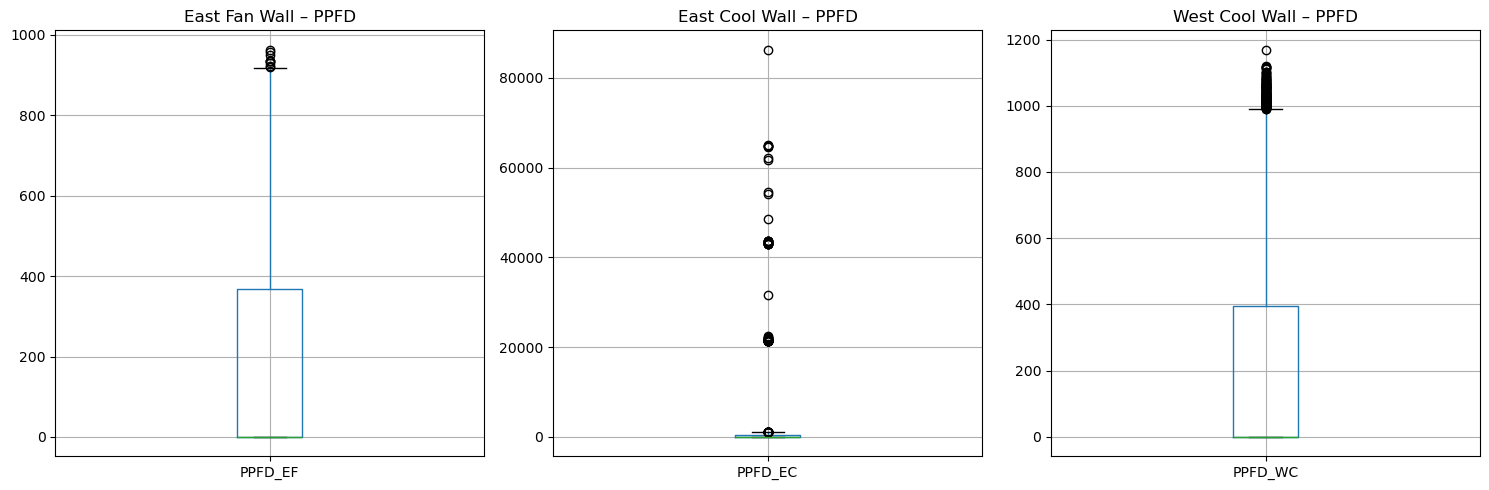

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

East_FW.boxplot(column=["PPFD_EF"], ax=axes[0])
axes[0].set_title("East Fan Wall – PPFD")

East_CW.boxplot(column=["PPFD_EC"], ax=axes[1])
axes[1].set_title("East Cool Wall – PPFD")

West_CW.boxplot(column=["PPFD_WC"], ax=axes[2])
axes[2].set_title("West Cool Wall – PPFD")

plt.tight_layout()
plt.show()

Solar radiation can't be greater than the solar constant (i.e., the amount of solar electromagnetic radiation received per unit area at the top of Earth's atmosphere when the Sun is at its average distance from the Earth; 1367 w/m<sup>2</sup>). If we convert the solar constant into PPFD, it becomes `1367 x 4.6 x 0.45` or `2829.69` μmol/m<sup>2</sup>/s. But a fraction of this energy will be lost while coming across Earth's atmosphere. Thus we are capping the maximum value for PPFD as `2500` μmol/m<sup>2</sup>/s; any values greater than 2500 will be replaced by the avergae of the previous and next values. We are also removing any value that is less than `0.2`

In [22]:
# function to remove outliers


def rm_ppfd_outlrs(data, low_thresh=0.2, high_thresh=2500):
    """
    Remove outliers from PPFD based on highest and lowest thresholds.
    Values < low_thresh are set to 0. Values > high_thresh are
    replaced with the mean of the previous and next values.
    """
    d = data.astype(float).copy()

    d = d.mask(d < low_thresh, 0)

    prev_ = d.shift(1)
    next_ = d.shift(-1)
    neighbor_mean = (prev_.fillna(next_) + next_.fillna(prev_)) / 2

    d = d.mask(d > high_thresh, neighbor_mean)

    return d

In [23]:
East_FW["PPFD_EF"] = rm_ppfd_outlrs(East_FW["PPFD_EF"])
East_CW["PPFD_EC"] = rm_ppfd_outlrs(East_CW["PPFD_EC"])
West_CW["PPFD_WC"] = rm_ppfd_outlrs(West_CW["PPFD_WC"])

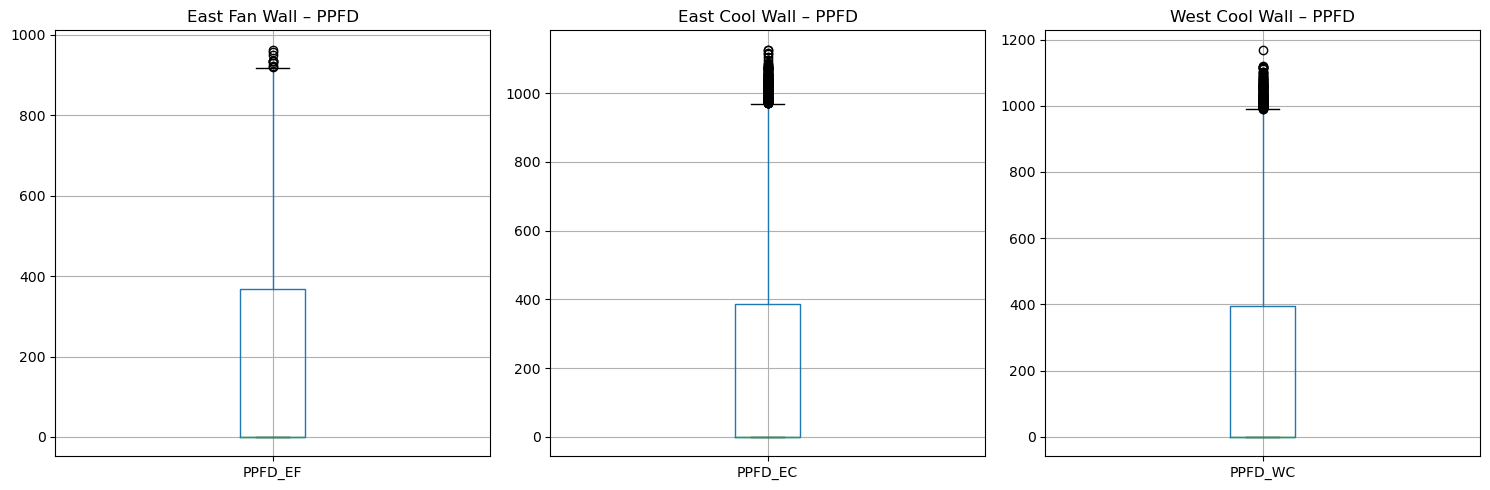

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

East_FW.boxplot(column=["PPFD_EF"], ax=axes[0])
axes[0].set_title("East Fan Wall – PPFD")

East_CW.boxplot(column=["PPFD_EC"], ax=axes[1])
axes[1].set_title("East Cool Wall – PPFD")

West_CW.boxplot(column=["PPFD_WC"], ax=axes[2])
axes[2].set_title("West Cool Wall – PPFD")

plt.tight_layout()
plt.show()

The data looks much better, especially for the `East Cool Wall`. Although, it might seem that there are still some oultiers, but we are not addressing them as outliers; these might be some extreme values that has a possibility to occur in a greenhouse.

#### b. Ambient Data

In [25]:
cols_amb = ["time", "PPFD_out", "Temperature_out", "Pressure_out", "VPD_out"]

Amb_Dat_sel = Amb_Dat[cols_amb]

In [26]:
Amb_Dat_sel.describe()

,time,PPFD_out,Temperature_out,Pressure_out,VPD_out
count,2976,2976.000000,2976.000000,2976.000000,2976.000000
mean,2025-10-16 11:52:29.999999744,315.397957,17.524597,99.711462,0.387285
min,2025-10-01 00:00:00,0.000000,1.400000,98.540000,0.000000
25%,2025-10-08 17:56:15,0.000000,12.500000,99.460000,0.010000
50%,2025-10-16 11:52:30,0.000000,17.600000,99.750000,0.130000
75%,2025-10-24 05:48:45,566.352000,22.400000,99.990000,0.560000
max,2025-10-31 23:45:00,1559.745000,29.900000,100.420000,2.300000
std,NaN,472.709293,6.091901,0.369360,0.527128


The data here looks fairly normal and does not need any manipulations (capping out maximum and minimum) as they fit into our criteria.

### 5. Resampling the Data

We resampled all datasets to an hourly time interval to standardize the different logging intervals across weather stations and to smoothen out short-term fluctuations caused by potential sensor noise. The original greenhouse data were collected every 10 minutes, ambient data every 15 minutes, while the energy-consumption data were logged hourly. Converting everything to a consistent hourly timestep ensures that the datasets align correctly for comparisons, correlations, and energy–environment analysis. Using the hourly mean also reduces high-frequency variability, making trends in temperature, humidity, PPFD, VPD, CO₂ etc. easier to interpret and more suitable for modeling and visualization.

In [27]:
# function to resample the data in an hourly basis


def resample_time(df, time_col, freq="H", how="mean"):
    """
    Resamples data into an hourly basis. Uses 'mean' as
    the aggregation method.
    """
    return df.set_index(time_col).resample(freq).agg(how).reset_index()

In [28]:
East_FW_hr = resample_time(East_FW, time_col="Date_EF", freq="h")
East_CW_hr = resample_time(East_CW, time_col="Date_EC", freq="h")
West_CW_hr = resample_time(West_CW, time_col="Date_WC", freq="h")

Amb_hr = resample_time(Amb_Dat_sel, time_col="time", freq="h")

In [29]:
# verify
East_FW_hr.head()

,Date_EF,PPFD_EF,Temperature_EF,Humidity_EF,CO2_EF,Dew Point_EF,VPD_EF,Pressure_EF
0,2025-10-01 00:00:00,0.0,20.419167,98.546500,636.683333,20.105500,0.035000,99.517833
1,2025-10-01 01:00:00,0.0,20.394000,98.453500,639.333333,20.065167,0.037333,99.515000
2,2025-10-01 02:00:00,0.0,20.388667,98.566833,573.033333,20.078500,0.034500,99.514000
3,2025-10-01 03:00:00,0.0,20.390833,97.727833,592.500000,19.943833,0.054500,99.529667
4,2025-10-01 04:00:00,0.0,20.364333,98.102333,598.583333,19.978667,0.045333,99.545667


In [30]:
Amb_hr.head()

,time,PPFD_out,Temperature_out,Pressure_out,VPD_out
0,2025-10-01 00:00:00,0.0,19.650,99.4825,0.0000
1,2025-10-01 01:00:00,0.0,19.725,99.4800,0.0100
2,2025-10-01 02:00:00,0.0,19.925,99.4775,0.0075
3,2025-10-01 03:00:00,0.0,19.500,99.4900,0.0025
4,2025-10-01 04:00:00,0.0,19.550,99.5100,0.0000


### 6. Renaming Columns

In [31]:
East_FW_hr.rename(
    columns={
        "Date_EF": "Timestamp",
        "PPFD_EF": "PPFD",
        "Temperature_EF": "Temperature",
        "Humidity_EF": "Humidity",
        "CO2_EF": "CO2",
        "Dew Point_EF": "Dew Point",
        "VPD_EF": "VPD",
        "Pressure_EF": "Pressure",
    },
    inplace=True,
)

In [32]:
East_CW_hr.rename(
    columns={
        "Date_EC": "Timestamp",
        "PPFD_EC": "PPFD",
        "Temperature_EC": "Temperature",
        "Humidity_EC": "Humidity",
        "CO2_EC": "CO2",
        "Dew Point_EC": "Dew Point",
        "VPD_EC": "VPD",
        "Pressure_EC": "Pressure",
    },
    inplace=True,
)

In [33]:
West_CW_hr.rename(
    columns={
        "Date_WC": "Timestamp",
        "PPFD_WC": "PPFD",
        "Temperature_WC": "Temperature",
        "Humidity_WC": "Humidity",
        "CO2_WC": "CO2",
        "Dew Point_WC": "Dew Point",
        "VPD_WC": "VPD",
        "Pressure_WC": "Pressure",
    },
    inplace=True,
)

In [34]:
Amb_hr.rename(
    columns={
        "time": "Timestamp",
        "PPFD_out": "PPFD",
        "Temperature_out": "Temperature",
        "VPD_out": "VPD",
        "Pressure_out": "Pressure",
    },
    inplace=True,
)

In [35]:
Energy_Cons.rename(
    columns={
        "Date": "Timestamp",
        "Energy _East": "East Greenhouse",
        "Energy _West": "West Greenhouse",
    },
    inplace=True,
)

In [36]:
# verify
East_CW_hr.head()

,Timestamp,PPFD,Temperature,Humidity,CO2,Dew Point,VPD,Pressure
0,2025-10-01 00:00:00,0.0,20.240500,99.253500,654.350000,20.043167,0.017667,99.452333
1,2025-10-01 01:00:00,0.0,20.257167,99.204333,657.666667,20.051500,0.019000,99.452000
2,2025-10-01 02:00:00,0.0,20.265333,99.223167,588.616667,20.062667,0.018500,99.449833
3,2025-10-01 03:00:00,0.0,20.267000,99.190000,608.200000,20.059000,0.019167,99.464000
4,2025-10-01 04:00:00,0.0,20.219500,99.204167,612.033333,20.014000,0.019000,99.479000


In [37]:
Energy_Cons.head()

,Timestamp,East Greenhouse,West Greenhouse
0,2025-10-01 00:00:00.000,1.206440,0.893626
1,2025-10-01 01:00:00.000,1.224793,0.653910
2,2025-10-01 02:00:00.000,1.213534,0.656950
3,2025-10-01 03:00:00.005,1.223580,0.653320
4,2025-10-01 04:00:00.010,1.124309,0.535340


### 7. Add Location Info to Data

In [38]:
East_FW_hr["Location"] = "East Fan Wall"
East_CW_hr["Location"] = "East Cool Wall"
West_CW_hr["Location"] = "West Cool Wall"
Amb_hr["Location"] = "Ambient"

In [39]:
# verify
Amb_hr.head()

,Timestamp,PPFD,Temperature,Pressure,VPD,Location
0,2025-10-01 00:00:00,0.0,19.650,99.4825,0.0000,Ambient
1,2025-10-01 01:00:00,0.0,19.725,99.4800,0.0100,Ambient
2,2025-10-01 02:00:00,0.0,19.925,99.4775,0.0075,Ambient
3,2025-10-01 03:00:00,0.0,19.500,99.4900,0.0025,Ambient
4,2025-10-01 04:00:00,0.0,19.550,99.5100,0.0000,Ambient


### 8. Merge Data

In [40]:
merged = pd.concat([East_FW_hr, East_CW_hr, West_CW_hr, Amb_hr], ignore_index=True)

In [41]:
# verify
merged.sample(5)

,Timestamp,PPFD,Temperature,Humidity,CO2,Dew Point,VPD,Pressure,Location
1185,2025-10-19 09:00:00,250.127000,24.329500,96.493833,563.400000,23.615500,0.105667,99.387167,East Cool Wall
944,2025-10-09 08:00:00,157.438000,24.252833,97.827167,624.616667,23.768167,0.066500,100.104167,East Cool Wall
1428,2025-10-29 12:00:00,167.823167,24.430667,92.104667,556.083333,22.954167,0.242167,98.576000,East Cool Wall
1652,2025-10-07 20:00:00,0.000000,22.673000,99.656333,800.533333,22.512833,0.009500,99.746000,West Cool Wall
580,2025-10-25 04:00:00,0.000000,19.902833,78.525500,548.100000,16.013000,0.503667,100.279667,East Fan Wall


### 9. Standardize the Timestamp for Energy Consumption Data

In [42]:
Energy_Cons["Timestamp"] = Energy_Cons["Timestamp"].dt.floor("h")

In [43]:
# verify
Energy_Cons.head()

,Timestamp,East Greenhouse,West Greenhouse
0,2025-10-01 00:00:00,1.206440,0.893626
1,2025-10-01 01:00:00,1.224793,0.653910
2,2025-10-01 02:00:00,1.213534,0.656950
3,2025-10-01 03:00:00,1.223580,0.653320
4,2025-10-01 04:00:00,1.124309,0.535340


## **Data Plotting and Analysis**

### 1. Temperature

#### a. Hourly Temperature for All Locations

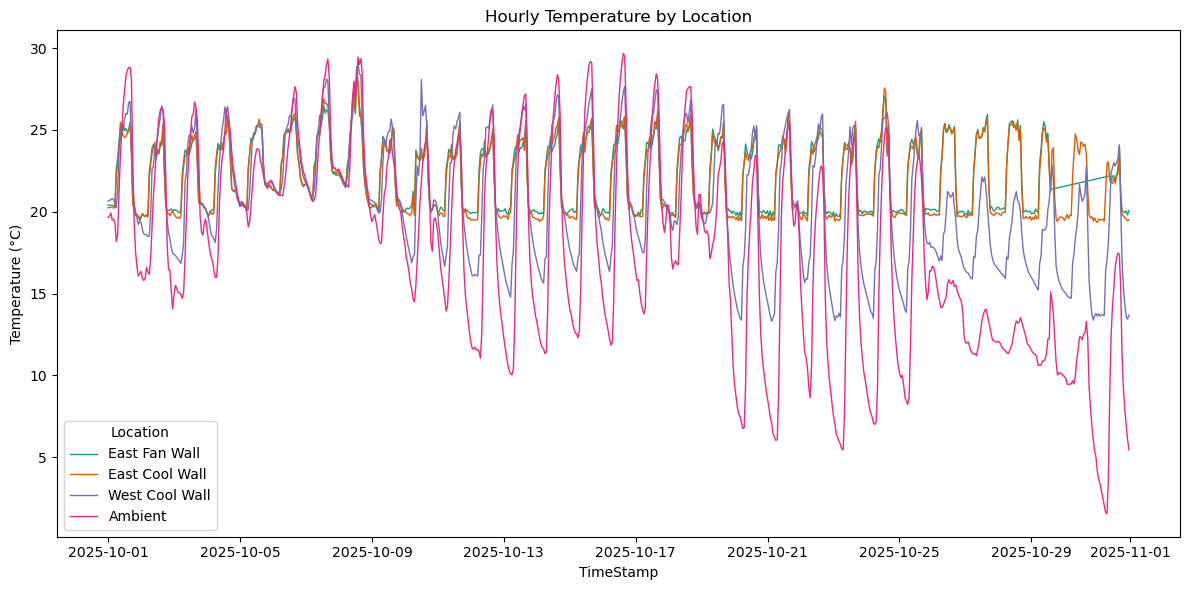

In [44]:
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=merged, x="Timestamp", y="Temperature", hue="Location", palette="Dark2", linewidth=1
)
plt.xlabel("TimeStamp")
plt.ylabel("Temperature (°C)")
plt.title("Hourly Temperature by Location")
plt.tight_layout()
plt.show()

The graph shows clear differences in temperature across two greenhouses compared to ambient conditions. The East Fan Wall and East Cool Wall maintain relatively stable temperatures, generally ranging from 20–26 °C, reflecting the warmer heating setpoints used in the East greenhouse. In contrast, the West Cool Wall exhibits much larger nighttime temperature drops, often falling to 10–15 °C, and with daytime temperatures reaching up to 22–26 °C- which aligns with the lower heating set points for that bay. The ambient outdoor temperature shows the widest fluctuation, ranging from about 3 °C at night to over 28–30 °C during day. There are also some missing data for East Fan Wall sensor, as it had to go under maintenance for that specific period.

#### b. East vs. West Greenhouse

_Note:_ Since we don't have the data for West Fan Wall side (see earlier explanation), we are assuming the average data for West greenhouse as West Fan Wall side data.

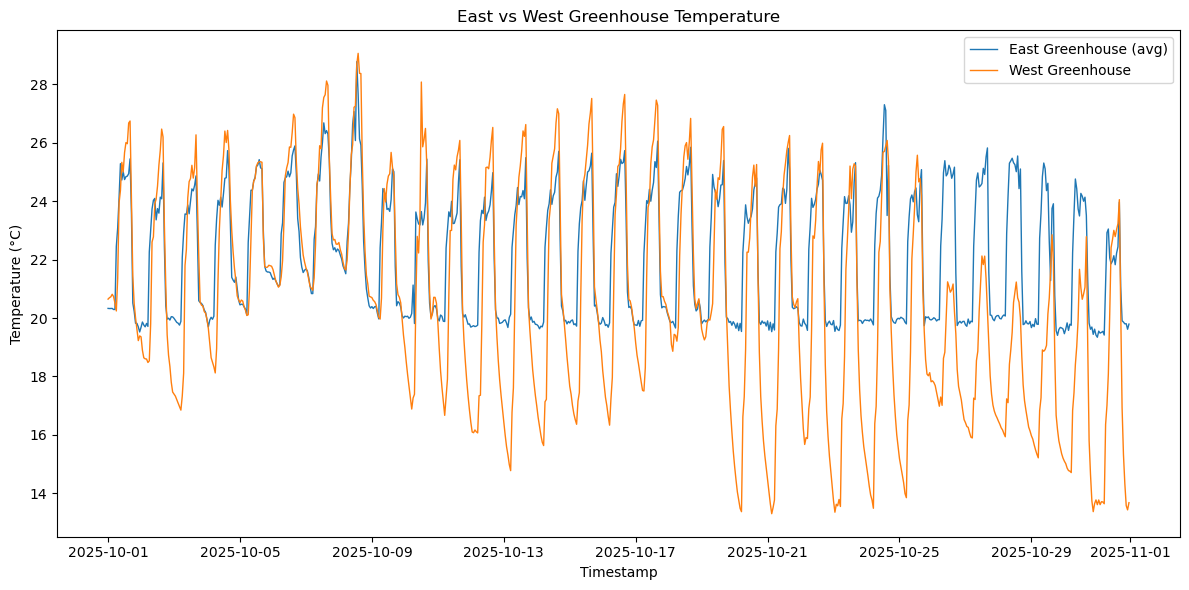

In [45]:
# wide table with one column per Location
wide = merged.pivot_table(index="Timestamp", columns="Location", values="Temperature")

# avg temperature for East greenhouse
east_avg = wide[["East Fan Wall", "East Cool Wall"]].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(wide.index, east_avg, linewidth=1, label="East Greenhouse (avg)")
plt.plot(wide.index, wide["West Cool Wall"], linewidth=1, label="West Greenhouse")
plt.xlabel("Timestamp")
plt.ylabel("Temperature (°C)")
plt.title("East vs West Greenhouse Temperature")
plt.legend()
plt.tight_layout()
plt.show()

This graph highlights temperature differences resulting from the two greenhouse set point strategies. The East greenhouse, operated with higher heating set points, maintains a more stable temperature profile. It's temperature generally ranges between 20–26 °C with smaller nighttime drops. On the other hand, the West greenhouse, which uses much lower heating set points, shows significantly larger temperature variations. This variations are seen especially at night, often dropping to 14–17 °C before rising to 24–28 °C again during the day. These daily fluctuations in the West greenhouse reflect its cooler operational strategy and reduced nighttime heating. Although, since we don't have the average values for variables for the West greenhouse (one weather station went under maintenance), it won't be ideal to draw a conclusion from the single weather station data only. Overall, the East greenhouse achieves tighter temperature control and higher minimum temperatures, while the West greenhouse experiences high variations and lower nighttime minimum temperatures due to its energy-saving strategy.

### 2. PPFD

#### a. Hourly PPFD for All Locations

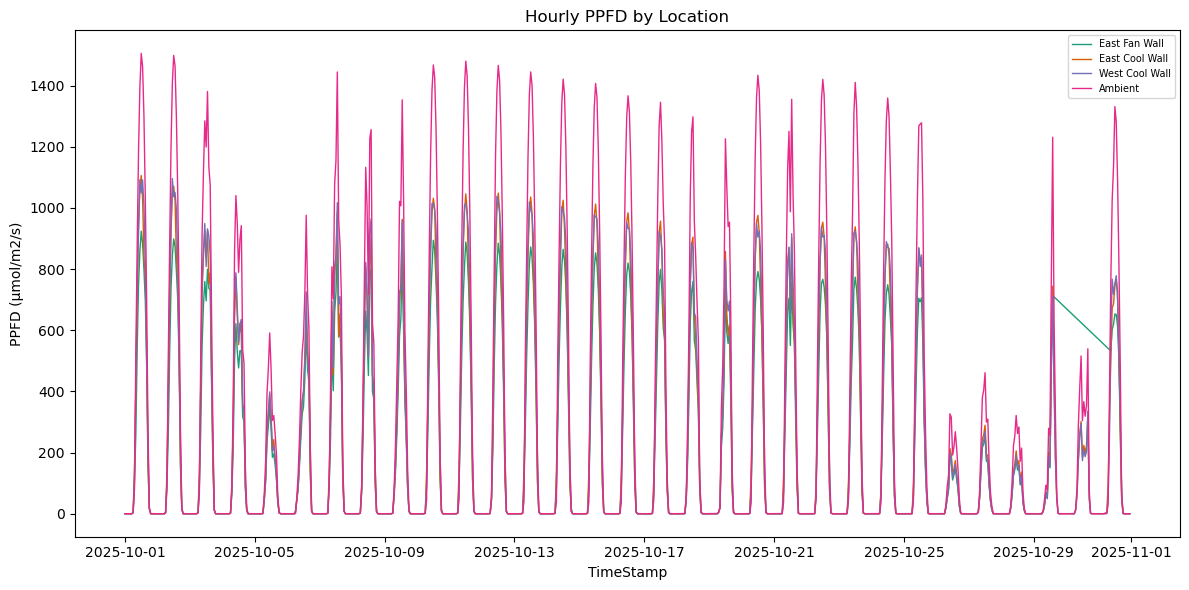

In [46]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x="Timestamp", y="PPFD", hue="Location", palette="Dark2", linewidth=1)
plt.xlabel("TimeStamp")
plt.ylabel("PPFD (μmol/m2/s)")
plt.title("Hourly PPFD by Location")
plt.legend(loc="upper right", fontsize=7, title_fontsize=7)
plt.tight_layout()
plt.show()

The PPFD patterns show daily cycles of solar load across all locations, with values rising sharply during daylight hours and dropping to zero at night. The ambient PPFD consistently reaches the highest peaks- often between 1300–1500 µmol/m²/s and represents full sunlight. Inside the greenhouse, PPFD levels are reduced due to structural shading and glazing. The East Cool Wall and West Cool Wall typically show slightly higher PPFD values (900–1100 µmol/m²/s) compared to the East Fan Wall sensors (800–1000 µmol/m²/s). This is probably because the cooling-wall side received more direct light. Despite small differences between sensor locations, the overall PPFD patterns inside both greenhouses follow outdoor light availability closely. We can also identify some missing values for East Cool Wall sensor as it had to go under maintenance during that period.

#### b. East vs West Greenhouse

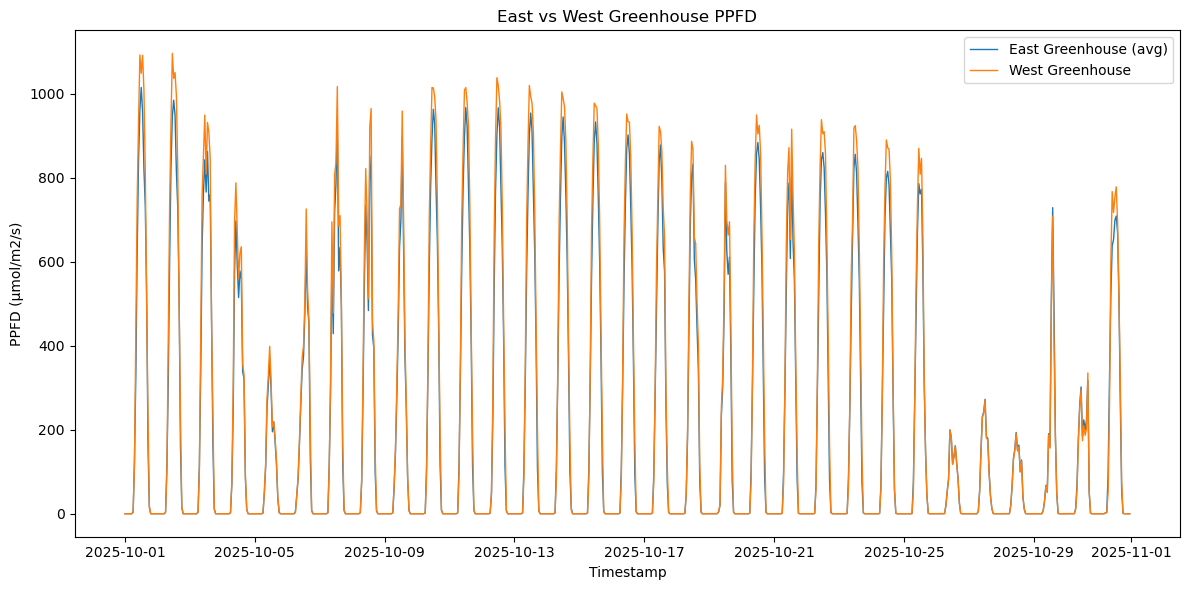

In [47]:
wide = merged.pivot_table(index="Timestamp", columns="Location", values="PPFD")

# avg PPFD for East greenhouse
east_avg = wide[["East Fan Wall", "East Cool Wall"]].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(wide.index, east_avg, linewidth=1, label="East Greenhouse (avg)")
plt.plot(wide.index, wide["West Cool Wall"], linewidth=1, label="West Greenhouse")
plt.xlabel("Timestamp")
plt.ylabel("PPFD (μmol/m2/s)")
plt.title("East vs West Greenhouse PPFD")
plt.legend()
plt.tight_layout()
plt.show()

We can see here that, both the East and West greenhouses follow very similar daily PPFD patterns, with sunlight-driven peaks occurring each day and values dropping to zero at night. Peak PPFD levels inside the greenhouses typically ranged from 800–1050 µmol/m²/s, depending on cloud cover and solar angle.

### 3. VPD

#### a. Hourly VPD for All Locations

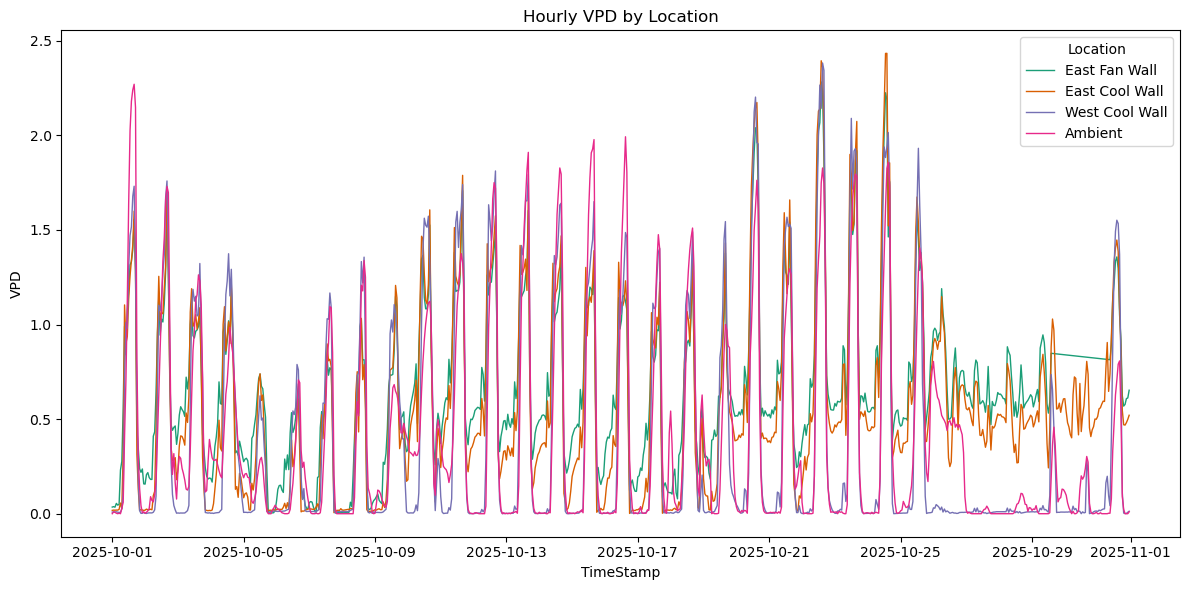

In [48]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x="Timestamp", y="VPD", hue="Location", palette="Dark2", linewidth=1)
plt.xlabel("TimeStamp")
plt.ylabel("VPD")
plt.title("Hourly VPD by Location")
plt.tight_layout()
plt.show()

The VPD patterns indicates the pressure deficit to rose sharply during the day, reaching up to 1.0–2.0 kPa inside greenhouse and up to 2.3 kPa in ambient. These deficit values dropped close to 0 kPa at night when temperatures fell and humidity increased. The ambient VPD consistently reached the highest peaks, reflecting drier outdoor air during sunny periods. Inside the greenhouse, the East and West Cool Wall sensors generally showed slightly higher daytime VPD (1.0–1.6 kPa) than the Fan Wall side (0.5–1.2 kPa). This is due to the warmer air near the cooling wall during day. We can also identify some missing values for East Cool Wall sensor as it had to go under maintenance during that period.

#### b. East vs. West Greenhouse VPD

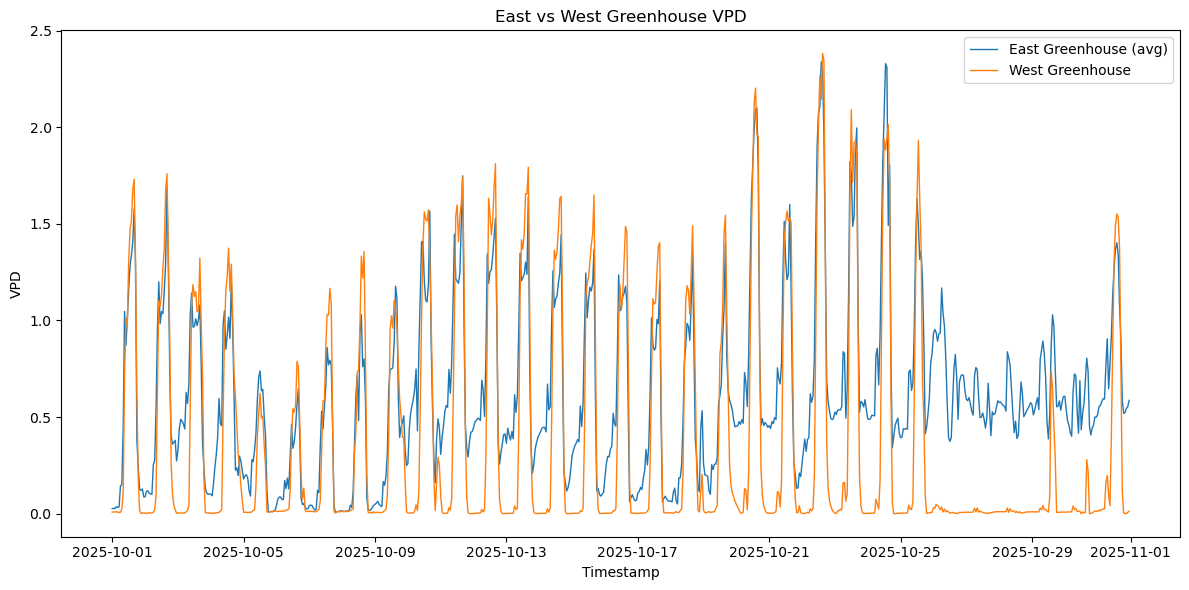

In [49]:
wide = merged.pivot_table(index="Timestamp", columns="Location", values="VPD")

# avg VPD for East greenhouse
east_avg = wide[["East Fan Wall", "East Cool Wall"]].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(wide.index, east_avg, linewidth=1, label="East Greenhouse (avg)")
plt.plot(wide.index, wide["West Cool Wall"], linewidth=1, label="West Greenhouse")
plt.xlabel("Timestamp")
plt.ylabel("VPD")
plt.title("East vs West Greenhouse VPD")
plt.legend()
plt.tight_layout()
plt.show()

The East vs. West VPD values show that, the West greenhouse consistently reached high daytime VPD (frequently 1.2–2.0 kPa), and occasionally up to 2.3 kPa, which is maybe because of its lower humidity and high temperature fluctuations. In comparison, the East greenhouse maintained more moderate VPD values, typically 0.5–1.5 kPa, due to its warmer set points and more stable temperature and humidity. Nighttime VPD in both houses dropped close to 0–0.1 kPa.

### 4. CO<sub>2</sub>

#### a. Hourly CO<sub>2</sub> for All Locations

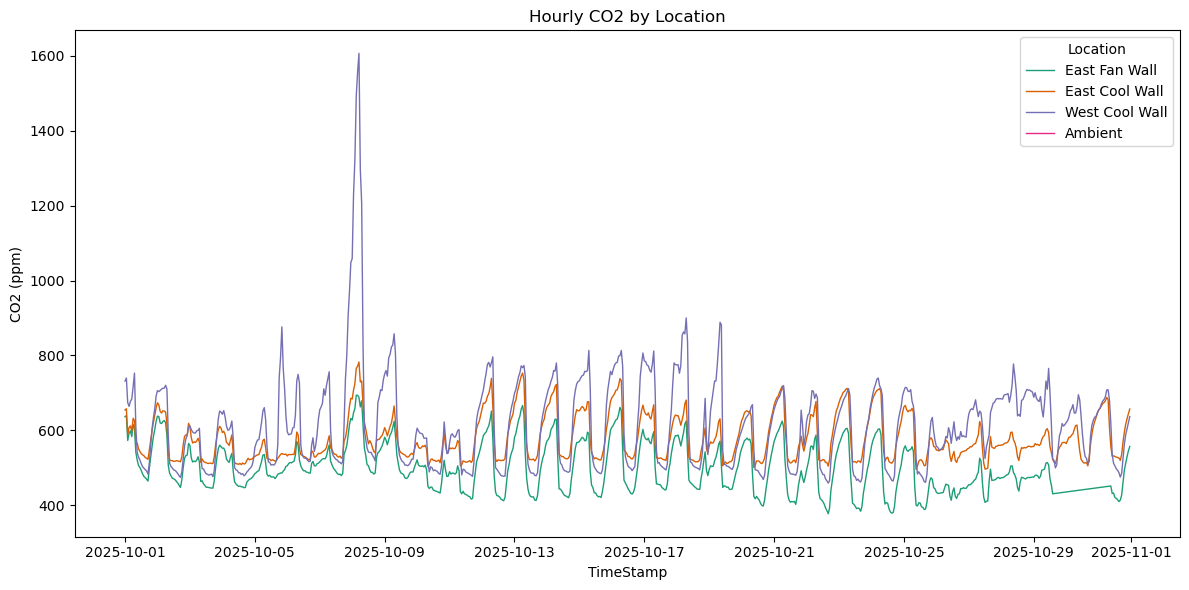

In [50]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x="Timestamp", y="CO2", hue="Location", palette="Dark2", linewidth=1)
plt.xlabel("TimeStamp")
plt.ylabel("CO2 (ppm)")
plt.title("Hourly CO2 by Location")
plt.tight_layout()
plt.show()

The CO<sub>2</sub> levels show regular daily fluctuations ranging between 450–700 ppm inside the greenhouses. The West Cool Wall showed higher CO<sub>2</sub> peaks (700–900 ppm), and at one point reaching ~1600 ppm. This point indicates the period of reduced ventilation or localized CO<sub>2</sub> buildup, hence reaching a value that is very high than the normal range. The East Cool Wall stayed moderately elevated in CO<sub>2</sub> concentration (550–700 ppm), while the East Fan Wall maintained the lowest and most stable levels (450–600 ppm). This is likely due to stronger airflow near the fan system. Ambient CO<sub>2</sub> remained relatively steady around 400–450 ppm.

#### b. East vs. West Greenhouse CO<sub>2</sub>

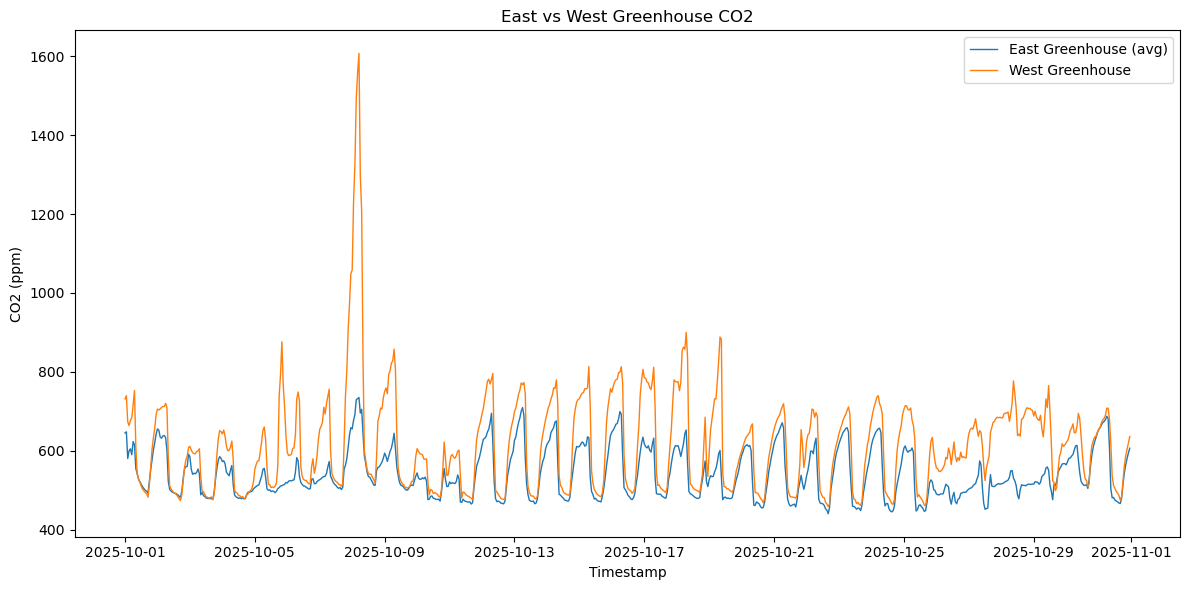

In [51]:
wide = merged.pivot_table(index="Timestamp", columns="Location", values="CO2")

# avg CO2 for East greenhouse
east_avg = wide[["East Fan Wall", "East Cool Wall"]].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(wide.index, east_avg, linewidth=1, label="East Greenhouse (avg)")
plt.plot(wide.index, wide["West Cool Wall"], linewidth=1, label="West Greenhouse")
plt.xlabel("Timestamp")
plt.ylabel("CO2 (ppm)")
plt.title("East vs West Greenhouse CO2")
plt.legend()
plt.tight_layout()
plt.show()

The West greenhouse showed higher CO<sub>2</sub> concentration than the East greenhouse. But we cannot conclude it confidently as the East greenhouse represents an avergae of two weather station data, while the West is from only one weather station (as the other station went under maintenance).

### 5. Pressure

#### a. Hourly Pressure for All Locations

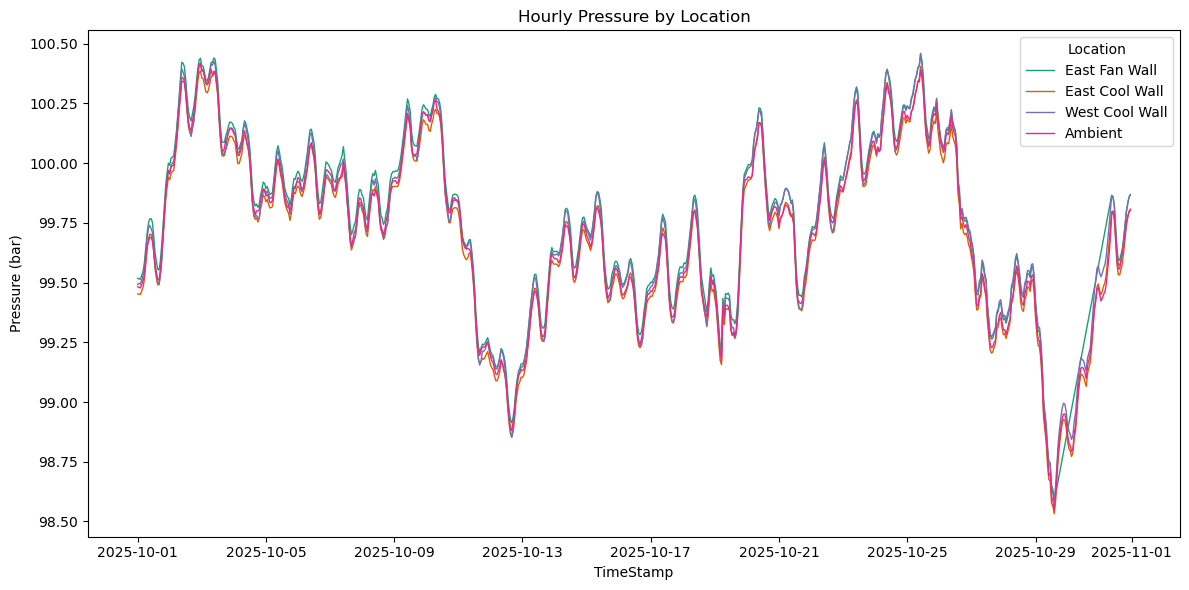

In [52]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged, x="Timestamp", y="Pressure", hue="Location", palette="Dark2", linewidth=1)
plt.xlabel("TimeStamp")
plt.ylabel("Pressure (bar)")
plt.title("Hourly Pressure by Location")
plt.tight_layout()
plt.show()

#### b. East vs. West Greenhouse Pressure

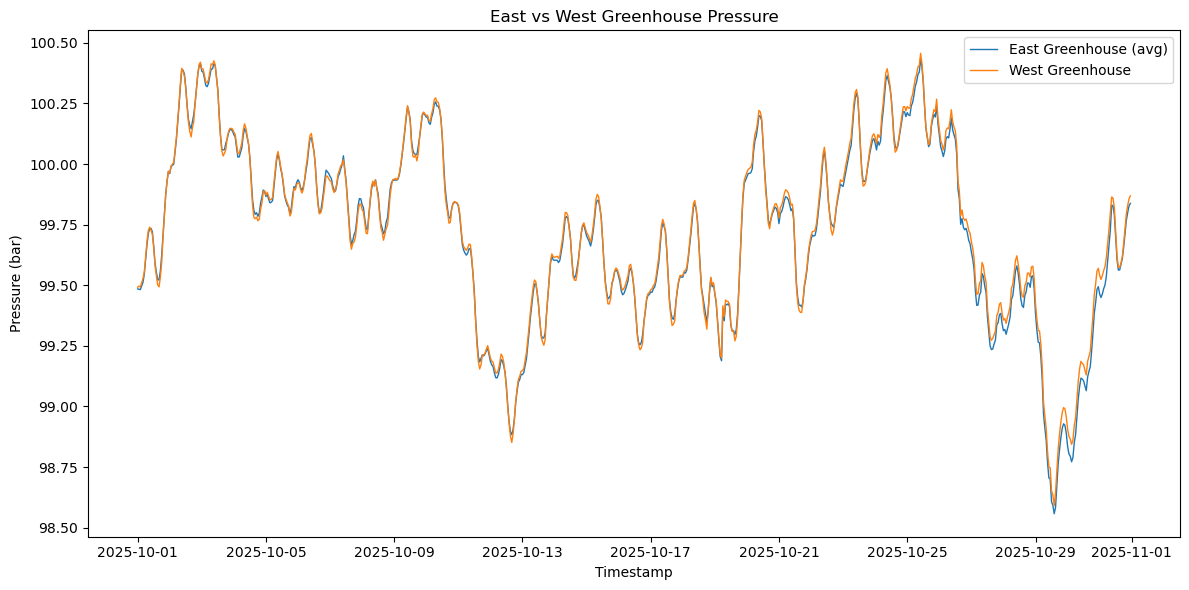

In [53]:
wide = merged.pivot_table(index="Timestamp", columns="Location", values="Pressure")

# avg CO2 for East greenhouse
east_avg = wide[["East Fan Wall", "East Cool Wall"]].mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(wide.index, east_avg, linewidth=1, label="East Greenhouse (avg)")
plt.plot(wide.index, wide["West Cool Wall"], linewidth=1, label="West Greenhouse")
plt.xlabel("Timestamp")
plt.ylabel("Pressure (bar)")
plt.title("East vs West Greenhouse Pressure")
plt.legend()
plt.tight_layout()
plt.show()

The pressure data remain relatively consistent across all locations and for the comparison between two greenhouses, with values ranging from 98.6 to 100.5 kPa and showed only small variations from sensor to sensor.

### 6. Energy Consumption

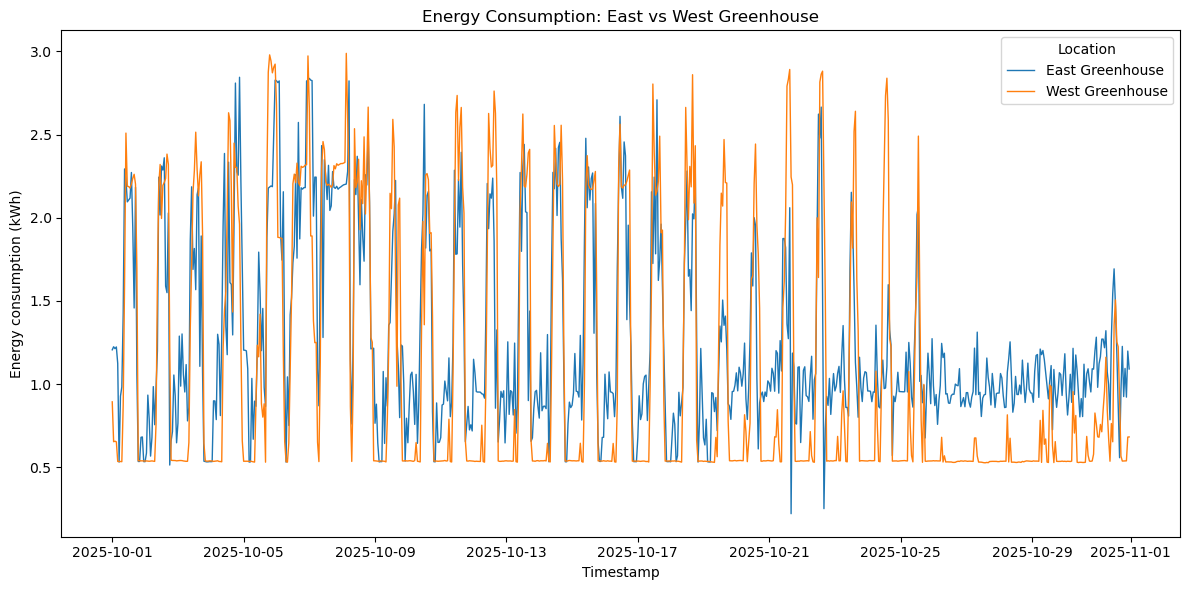

In [54]:
plt.figure(figsize=(12, 6))

plt.plot(
    Energy_Cons["Timestamp"], Energy_Cons["East Greenhouse"], linewidth=1, label="East Greenhouse"
)

plt.plot(
    Energy_Cons["Timestamp"], Energy_Cons["West Greenhouse"], linewidth=1, label="West Greenhouse"
)

plt.xlabel("Timestamp")
plt.ylabel("Energy consumption (kWh)")
plt.title("Energy Consumption: East vs West Greenhouse")
plt.legend(title="Location")
plt.tight_layout()
plt.show()

The energy consumption data showed that the typically consumption ranged between 1.5–3.0 kWh during active heating or cooling periods. The West greenhouse, operated with lower nighttime temperature set points, showed higher and more frequent energy spikes, reaching up to 2.5–3.0 kWh. This indicates higher heating demand due to larger temperature variation. The East greenhouse maintained more stable energy use, between 0.8 and 2.2 kWh.

## Machine Learning Modeling for Predicting Energy Consumption

We built a machine learning model to predict hourly energy consumption in the greenhouses based on inside climate and outside weather. This helps us understand how much of the energy use can be explained by measurable conditions and can support future work like optimizing setpoints or scheduling equipments in the greenhouses.

We tested four regression models:

- Linear Regression – a simple baseline model, assumes a straight-line relationship between prediction and predictors
- Random Forest Regressor – an ensemble of decision trees that can capture non-linear patterns
- Gradient Boosting Regressor – another tree ensemble that builds trees sequentially to reduce errors between true `y` and predicted `y`
- K-Nearest Neighbors (KNN) Regressor – it predicts the value of `y` from the average of similar past conditions

Input features included:

- Inside greenhouse variables: PPFD_GH, Temperature_GH, Humidity, CO₂, Dew Point, VPD_GH, Pressure_GH
- Ambient variables: PPFD_amb, Temperature_amb, Pressure_amb, VPD_amb

To compare models, we used:

- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)
- R<sup>2</sup> (coefficient of determination)

### 1. Libraries

In [55]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 2. Data Preparation

We created an unified dataset combining all greenhouse datasets, ambient dataset, and energy consumption dataset into one clean table. We joined the energy data with the greenhouse data and the ambient weather data using timestamps. For the East greenhouse, we averaged the two datasets (`East_FW_hr` and `East_CW_hr`) to get one value per hour. For the West greenhouse, we used the `West_CW_hr` data as its own hourly data. In the final table, each row is one greenhouse at one hour, with energy use, inside conditions, and outside conditions. We checked that there were no missing values in the variables we used.

#### a. New Dataset for East Greenhouse

We have created a new dataset named `East_avg` which is the average data for the climatic variables from `East_FW_hr` and `East_CW_hr`.

In [56]:
East_avg_hr = (
    pd.concat([East_CW_hr, East_FW_hr], ignore_index=True)
    .groupby("Timestamp")
    .mean(numeric_only=True)
    .reset_index()
)

In [57]:
# Updated location label
East_avg_hr["Location"] = "East"

In [58]:
# verify
East_avg_hr.head()

,Timestamp,PPFD,Temperature,Humidity,CO2,Dew Point,VPD,Pressure,Location
0,2025-10-01 00:00:00,0.0,20.329833,98.900000,645.516667,20.074333,0.026333,99.485083,East
1,2025-10-01 01:00:00,0.0,20.325583,98.828917,648.500000,20.058333,0.028167,99.483500,East
2,2025-10-01 02:00:00,0.0,20.327000,98.895000,580.825000,20.070583,0.026500,99.481917,East
3,2025-10-01 03:00:00,0.0,20.328917,98.458917,600.350000,20.001417,0.036833,99.496833,East
4,2025-10-01 04:00:00,0.0,20.291917,98.653250,605.308333,19.996333,0.032167,99.512333,East


#### b. Merge Energy Consumption and Greenhouse Data

In [59]:
# East Greenhouse
east = (
    Energy_Cons[["Timestamp", "East Greenhouse"]]
    .merge(East_avg_hr, on="Timestamp", how="inner")
    .merge(Amb_hr, on="Timestamp", how="left", suffixes=("_GH", "_amb"))
)

east.rename(columns={"East Greenhouse": "Energy"}, inplace=True)

In [60]:
# West Greenhouse
west = (
    Energy_Cons[["Timestamp", "West Greenhouse"]]
    .merge(West_CW_hr, on="Timestamp", how="inner")
    .merge(Amb_hr, on="Timestamp", how="left", suffixes=("_GH", "_amb"))
)

west["Location_GH"] = "West"
west.rename(columns={"West Greenhouse": "Energy"}, inplace=True)

In [61]:
# verify
east.sample(5)

,Timestamp,Energy,PPFD_GH,Temperature_GH,Humidity,CO2,Dew Point,VPD_GH,Pressure_GH,Location_GH,PPFD_amb,Temperature_amb,Pressure_amb,VPD_amb,Location_amb
38,2025-10-02 14:00:00,2.36088,814.162833,24.136833,61.866000,491.325000,16.314583,1.150833,100.184500,East,1296.6480,26.20,100.1700,1.4525,Ambient
359,2025-10-15 23:00:00,0.68070,0.000000,19.830417,95.220333,638.916667,18.965250,0.111083,99.556583,East,0.0000,15.65,99.5500,0.0050,Ambient
526,2025-10-22 22:00:00,0.95025,0.000000,19.790667,79.023250,593.841667,16.000000,0.487000,99.917583,East,0.0000,9.00,99.9050,0.0100,Ambient
79,2025-10-04 07:00:00,0.81120,69.916750,23.388917,83.993750,563.216667,20.414250,0.465333,100.118333,East,97.1865,16.00,100.1175,0.2025,Ambient
27,2025-10-02 03:00:00,0.79011,0.000000,19.699667,95.396750,632.258333,18.866833,0.105917,99.999667,East,0.0000,15.95,99.9900,0.0275,Ambient


In [62]:
west.sample(5)

,Timestamp,Energy,PPFD_GH,Temperature_GH,Humidity,CO2,Dew Point,VPD_GH,Pressure_GH,Location_GH,PPFD_amb,Temperature_amb,Pressure_amb,VPD_amb,Location_amb
598,2025-10-25 22:00:00,0.537891,0.000000,18.130833,99.737333,597.716667,18.031833,0.005500,100.267833,West,0.00000,16.400,100.2500,0.6750,Ambient
112,2025-10-05 16:00:00,0.530900,124.854833,25.331167,92.417000,519.133333,23.880667,0.245333,99.839667,West,193.85550,22.750,99.8150,0.0700,Ambient
182,2025-10-08 14:00:00,2.222930,965.136833,29.057500,66.935500,541.333333,22.186000,1.332833,99.737500,West,1256.38650,29.450,99.7275,1.2075,Ambient
373,2025-10-16 13:00:00,2.178990,932.402333,25.794500,65.821167,500.833333,18.854333,1.137167,99.369667,West,1312.94925,28.225,99.3500,1.5875,Ambient
81,2025-10-04 09:00:00,1.218370,694.087667,23.036167,81.709500,500.900000,19.642833,0.516833,100.148333,West,858.32550,20.375,100.1050,0.3400,Ambient


#### c. Creating an Unified Dataset

In [63]:
model_df = pd.concat([east, west], ignore_index=True)

In [64]:
# Sorting for cleanliness
model_df = model_df.sort_values(["Timestamp", "Location_GH"]).reset_index(drop=True)

In [65]:
# checking data consistency
print(model_df["Location_GH"].value_counts())
print(model_df.info())
print(model_df.isna().mean().sort_values(ascending=False))

Location_GH
East    744
West    744
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1488 entries, 0 to 1487
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        1488 non-null   datetime64[ns]
 1   Energy           1488 non-null   float64       
 2   PPFD_GH          1488 non-null   float64       
 3   Temperature_GH   1488 non-null   float64       
 4   Humidity         1488 non-null   float64       
 5   CO2              1488 non-null   float64       
 6   Dew Point        1488 non-null   float64       
 7   VPD_GH           1488 non-null   float64       
 8   Pressure_GH      1488 non-null   float64       
 9   Location_GH      1488 non-null   object        
 10  PPFD_amb         1488 non-null   float64       
 11  Temperature_amb  1488 non-null   float64       
 12  Pressure_amb     1488 non-null   float64       
 13  VPD_amb          1488 non-null 

#### d. Target Variable and Feature Selection

In [66]:
# target variable
y = model_df["Energy"]

In [67]:
# features selection
features = [
    "PPFD_GH",
    "Temperature_GH",
    "Humidity",
    "CO2",
    "Dew Point",
    "VPD_GH",
    "Pressure_GH",
    "PPFD_amb",
    "Temperature_amb",
    "Pressure_amb",
    "VPD_amb"
]

In [68]:
X = model_df[features]

### 3. Train/Validation/Test Split

We split the data into three parts: train, validation, and test. The train set is used to fit the models. The validation set is used to compare models and choose the best one. The test set is used only at the end to check how well the chosen model works on new data.

#### a. Train-Test Split

In [69]:
# using ._temp as a temporary variable
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2)

#### b. Train-Validation Split

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.2)

In [71]:
# verify
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (952, 11)
Validation: (238, 11)
Test: (298, 11)


### 4. Modeling Energy Consumption

#### a. Models

In [72]:
models = {
    "LinearRegression": Pipeline([("scaler", StandardScaler()), ("model", LinearRegression())]),
    "RandomForest": RandomForestRegressor(
        n_estimators=400, max_depth=None, min_samples_leaf=1, random_state=42, n_jobs=-1
    ),
    "GradientBoosting": GradientBoostingRegressor(
        n_estimators=400, learning_rate=0.2, max_depth=4, random_state=42
    ),
    "KNN": Pipeline([("scaler", StandardScaler()), ("model", KNeighborsRegressor(n_neighbors=5))]),
}

#### b. Metrics

In [73]:
# defining function for model metrics calculation


def evaluate(model, X_train, y_train, X_val, y_val):
    y_tr_pred = model.predict(X_train)
    y_va_pred = model.predict(X_val)

    mae_train = mean_absolute_error(y_train, y_tr_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_tr_pred))
    r2_train = r2_score(y_train, y_tr_pred)

    mae_val = mean_absolute_error(y_val, y_va_pred)
    rmse_val = np.sqrt(mean_squared_error(y_val, y_va_pred))
    r2_val = r2_score(y_val, y_va_pred)

    return mae_train, rmse_train, r2_train, mae_val, rmse_val, r2_val

#### c. Performance on Validation Dataset

In [74]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    mae_train, rmse_train, r2_train, mae_val, rmse_val, r2_val = evaluate(
        model, X_train, y_train, X_val, y_val
    )

    results.append(
        {
            "model": name,
            "MAE_train": mae_train,
            "RMSE_train": rmse_train,
            "R2_train": r2_train,
            "MAE_validation": mae_val,
            "RMSE_validation": rmse_val,
            "R2_validation": r2_val,
        }
    )

results_df = pd.DataFrame(results)

In [75]:
results_df

,model,MAE_train,RMSE_train,R2_train,MAE_validation,RMSE_validation,R2_validation
0,LinearRegression,0.319080,0.426515,0.605824,0.334921,0.468081,0.504784
1,RandomForest,0.057330,0.091673,0.981790,0.130227,0.207497,0.902686
2,GradientBoosting,0.008346,0.011043,0.999736,0.145233,0.226222,0.884330
3,KNN,0.149620,0.240369,0.874808,0.189900,0.314011,0.777135


Linear Regression had the weakest results, with higher errors and lower R<sup>2</sup> (0.50). KNN did better, but still had larger errors than the tree models. Random Forest and Gradient Boosting were the strongest. Random Forest had the lowest validation RMSE (0.21) and the highest R<sup>2</sup> (0.90), which means it explained the most variation in energy use and made the most accurate predictions on new data. Gradient Boosting was close behind, with slightly higher error and slightly lower R<sup>2</sup>.

We chose Random Forest as the best performing model for our data and applied it on new data i.e., test set.

#### d. Performance on Test Dataset

In [76]:
rand_forest = RandomForestRegressor(
    n_estimators=400, max_depth=None, min_samples_leaf=1, random_state=42, n_jobs=-1
)

rand_forest.fit(X_train, y_train)

y_test_pred = rand_forest.predict(X_test)

In [77]:
# metrics
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Random Forest on Test Set:")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R2: {r2_test:.2f}")

Random Forest on Test Set:
MAE: 0.16
RMSE: 0.25
R2: 0.87


The mean absolute error is about 0.16, which means that, on average, the prediction is off by 0.16 energy units per hour. The RMSE is about 0.25, so large errors are still quite small. The R<sup>2</sup> value is about 0.87, which means the model explains about 87 percent of the variation in hourly energy use in the test period. This shows that the Random Forest model captures the main patterns in the data and gives much accurate predictions on new data.